In [20]:
import math
import random
from collections import defaultdict, Counter, deque
from typing import Tuple, List, Set, Dict, Counter
from typing import Any, Sequence, Mapping, Iterable, Iterator
from itertools import product, chain, islice
import doctest
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import colorama
from colorama import Fore
import numpy as np
import pylab 
import scipy.stats as stats
from scipy.stats import shapiro 
from scipy.stats import lognorm
import pandas as pd
import seaborn as sns

This is the code to find a function from the number of players to the time it takes for them to get ordered for the random matching and for the elo matching.

In [137]:
class Player:
    """A player with real skill and obvservable elo.
    
    >>> Player('p1', '', '1000')  # test robustness
    Traceback (most recent call last):
        ...
    AssertionError: Must not be empty
    >>> playerA = Player('p1',1001, 1000)
    >>> playerA  # also tests __repr__()
    Player(1001, 1000)
    >>> playerA.update(10)
    >>> print(playerA)  # also tests __str__()
    (1001,1010)
    """
    def __init__(self,name:str, skill: int, elo:int) -> None:
        """Create player with given state.
        """
        assert name and skill and elo, "Must not be empty"
        self.skill: int = skill
        self.elo: int = elo
        self.name: str = name
            
    def __repr__(self) -> str:
        """Return machine-processable string representation of current state.
        """
        return f"Player({self.name},{str(self.skill)}, {str(self.elo)})"
    
    def __str__(self) -> str:
        """Return human-readable string representation of current state.
        """
        return f"({self.name},{self.skill},{self.elo})"
    
    def update(self, gain : int) -> None:
        """ Update the elo after a match"""
        self.elo = self.elo + gain


def match_chess(player1 : Player, player2: Player)->None:
    P1win = 1/(1+10**((player2.skill - player1.skill)/400))
    P1expec = 1/(1+10**((player2.elo - player1.elo)/400))
    res = random.random()
    
    if res <= P1win:
        player1.update( int(maxelogain*(1-P1expec)) ) 
        player2.update( int(maxelogain*(-1+P1expec) ))
    elif res > P1win:
        player1.update( int(maxelogain*(-P1expec) ) )
        player2.update( int(maxelogain*(P1expec )))

def chess_round_rand(players:List[Player]) -> None:
    random.shuffle(players)
    order = players
    for i in range(len(players))[::2]:
        match_chess(order[i], order[i+1])


def ranked_elo(players2:List[Player]):
    'input a list of players (important). Output a ranked list of players. '
    players=players2.copy()
    players.sort(key= lambda x: x.elo)
    players.reverse()
    return players
def ranked_skill(players2:List[Player]):
    'same as above, but this is real skill, baby!'
    'Every element is a rank, if multiple player have the same elo, they are in the same rank (i.e same list-element)'
    players=players2.copy()
    players.sort(key= lambda x: x.skill)
    players.reverse()
    ranks = []
    current=[]
    for p in players:
        if (len(ranks)==0 and len(current)==0):
            current += [p]
        else:
            if p.skill == current[0].skill:
                current += [p]
            else:
                ranks += [current]
                current = [p]
    if len(current)!=0:
        ranks += [current]
    return ranks
def position_score(players:List[Player]):
    r_skill=ranked_skill(players)
    r_elo=ranked_elo(players)
    lenskill=len(ranked_skill(players))
    
    indxplayer = 0
    r_elo_mch = []
    for r in range(lenskill):
        curr=[]
        for i in range(len(r_skill[r])):
            curr += [r_elo[indxplayer]]
            indxplayer += 1
        r_elo_mch += [curr]
    r_elo = r_elo_mch
    score = 0
    for i in range(lenskill):
        if r_skill[i] == r_elo[i]: 
            #print(Fore.GREEN + str(i+1)+'::',  str([p.name for p in r_skill[i]])+' vs ',   str([p.name for p in r_elo[i]]))
            score += len(r_skill[i])
        elif r_skill[i] != r_elo[i]:
            #print(Fore.RED + str(i+1)+'::',  str([p.name for p in r_skill[i]]) +' vs ',   str([p.name for p in r_elo[i]]))
            score += 0
    return score

In [142]:
#Initialize stuff
df_rand = pd.DataFrame({"nº players":[], "games until ordered":[]})
df_elo = pd.DataFrame({"nº players":[], "games until ordered":[]})
monte_n = 20

In [168]:
#graph for random
max_players = 18
for n_players in range(16,max_players):
    n_players = n_players*2 #make number even
    
    for i in range(20): #we will do this a bunch of times for every number of players
        print(n_players, i)
        player_names = ['p'+str(i) for i in range(1,n_players+1)] #create the players
        player_skills = [ random.randint(1,2800) for i in range(1,n_players+1)]
        players = [Player(player_names[i],  player_skills[i], 1000) for i in range(n_players)]
        
        chess_round_rand(players)
        games_req = 1
        while position_score(players) != n_players: #check if players are ordered already
            chess_round_rand(players)
            games_req += 1
            if games_req>2000000:
                print(players)
                break
        df_rand = df_rand.append({'nº players':n_players, 'games until ordered':games_req},  ignore_index=True)

32 0
32 1
32 2
32 3
32 4
32 5
32 6
32 7
32 8
32 9
32 10
32 11
32 12
32 13
32 14
32 15
32 16
[Player(p12,715, 570), Player(p1,1973, 1747), Player(p4,597, 381), Player(p20,1018, 733), Player(p6,1690, 1468), Player(p9,1006, 892), Player(p23,870, 711), Player(p32,2461, 2276), Player(p26,289, 205), Player(p29,655, 568), Player(p21,765, 577), Player(p13,1612, 1347), Player(p11,2447, 2114), Player(p31,302, 151), Player(p16,1610, 1314), Player(p19,916, 792), Player(p30,714, 610), Player(p28,2197, 1837), Player(p22,64, 7), Player(p14,246, 109), Player(p10,2187, 1945), Player(p5,1620, 1358), Player(p7,355, 260), Player(p8,1284, 1059), Player(p17,1614, 1361), Player(p18,986, 857), Player(p24,1306, 1050), Player(p2,1165, 982), Player(p15,1120, 912), Player(p27,1605, 1406), Player(p3,647, 548), Player(p25,2202, 1853)]
32 17
32 18
32 19
34 0


KeyboardInterrupt: 

C:\Users\giuli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


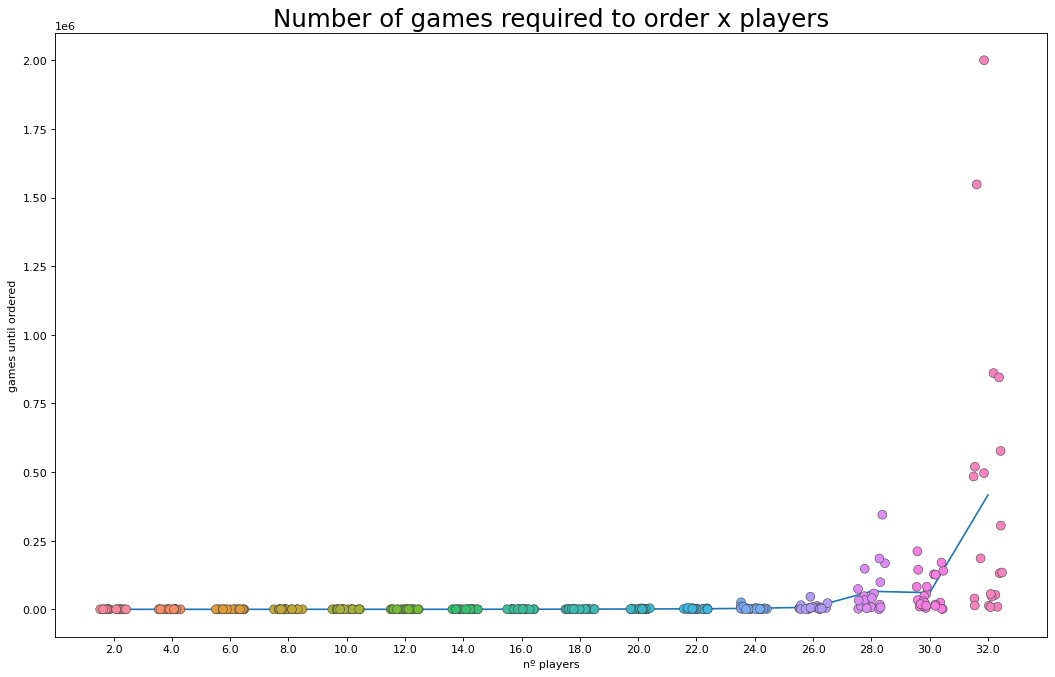

In [169]:
# Draw Stripplot

fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_rand['nº players'], df_rand['games until ordered'], jitter=0.25, size=8, ax=ax, linewidth=.5)
df_rand.groupby('nº players')['games until ordered'].mean().reset_index()['games until ordered'].plot()

# Decorations
plt.title('Number of games required to order x players', fontsize=22)
fig.savefig('Avg times to order 2')
plt.show()

In [165]:
df_rand

,nº players,games until ordered
0,2.0,1.0
1,2.0,2.0
2,2.0,1.0
3,2.0,1.0
4,2.0,1.0
...,...,...
296,30.0,23988.0
297,30.0,18899.0
298,30.0,82338.0
299,30.0,126044.0
